<a href="https://colab.research.google.com/github/SamSun3105/Personal-Expense-Tracker1/blob/main/Marketing_Campaigns_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
# Name: Shivam Suman
# Marketing Campaigns Project1 (Applied Data Science With Python)

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

**Read and understand the dataframe**

In [136]:
df2 = pd.read_excel('Data Dictionary - Response to marketing campaigns.xlsx',sheet_name = 'Sheet1')
df2 # Variable Information

,Variable,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,number of small children in customer's househo...
6,Teenhome,no of teenagers in customer's house
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,number of days since the last purchase
9,MntWines,amount spent on wine in last 2 years


In [137]:
md = pd.read_csv('marketing_data.csv')
pd.set_option('display.max_columns', None)
md.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Exploratory Data Analysis of the given Data


---



In [138]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [139]:
md.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
md.columns # Here we can see Column 'Income' has extra spaces from both sides

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [141]:
md.columns = md.columns.str.replace(' ', '').str.lower() # Removing Extra spaces in columns

In [142]:
md.columns # Can see extra spaces are removed

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country'],
      dtype='object')

In [143]:
# Income is in format '$84,835.00 ' , An string with extra spaces and $ symbol , need to convert this into Float/Int. Before doing any analysis
md['income'].sample(10)

,income
265,"$22,070.00"
458,"$41,145.00"
255,"$35,178.00"
1171,"$15,345.00"
2044,"$23,228.00"
1957,"$46,098.00"
1156,"$67,433.00"
627,"$15,315.00"
2179,"$86,857.00"
912,"$75,114.00"


In [144]:
md['income'] = md['income'].replace('[\$,]', '', regex=True).astype(float)
md['income'].sample(10) # Now Income column is ready for doing furthur analysis

,income
694,30096.0
963,42387.0
1304,41713.0
629,87171.0
1893,46106.0
470,80141.0
1031,69674.0
1508,64355.0
891,48186.0
1554,42394.0


In [145]:
# Dt_Customer : 'Date of customer's enrollment with the company' is an object . Standrdizing the date from object
md['dt_customer'] = pd.to_datetime(md['dt_customer'], errors='coerce') # standrdizing the date from object
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   income               2216 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   mntwines             2240 non-null   int64         
 10  mntfruits            2240 non-null   int64         
 11  mntmeatproducts      2240 non-null   int64         
 12  mntfishproducts      2240 non-null   int64         
 13  mntsweetproducts     2240 non-nul

/tmp/ipython-input-145-76095170.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  md['dt_customer'] = pd.to_datetime(md['dt_customer'], errors='coerce') # standrdizing the date from object




*   **Income and Dt_Customer Now impoarted in standard format***


---





In [146]:
# Checking the catagorical columns
cat_cols = ['education', 'marital_status']
for col in cat_cols:
    print(f"Unique values in {col}: {md[col].unique()}")


Unique values in education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Unique values in marital_status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [147]:
# Lets check the value counts of each categorical column
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(md[col].value_counts())

Value counts for education:
education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Value counts for marital_status:
marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [148]:
# - There are some Marital_Status that can be grouped together, such as 'Alone','YOLO and 'Absurd'  to 'Single'
Marital_Status_mapping = {
    'Married': 'couple',
    'Together': 'couple',
    'Single': 'alone',
    'Divorced': 'alone',
    'Widow': 'alone',
    'Alone': 'alone',
    'YOLO': 'alone',
    'Absurd': 'alone'
}
# Apply the mapping to the Marital_Status column
md['marital_status'] = md['marital_status'].map(Marital_Status_mapping)
md['marital_status'].value_counts()

,count
marital_status,
couple,1444
alone,796


In [149]:
md.groupby(['education', 'marital_status'])[['income']].mean().unstack()['income']

marital_status,alone,couple
education,,
2n Cycle,51957.984375,45597.992647
Basic,17998.350000,21663.852941
Graduation,52615.569652,52779.380952
Master,53170.472000,52785.795833
PhD,54050.657143,57343.238562


In [150]:
# What does "2n Cycle" mean?
# "2nd Cycle" (often written "2º Ciclo" or "2n Cycle") is a European/Portuguese academic term.

# It typically refers to a Master’s level degree, part of the Bologna Process:

# 1st Cycle → Bachelor's

# 2nd Cycle → Master's

# 3rd Cycle → PhD

In [151]:
md['education'] = md['education'].replace({
    'Graduation': 'Graduate',
    'PhD': 'PhD',
    'Master': "Master's",
    '2n Cycle': "Master's",
    'Basic': 'Primary'
})
md['education'].value_counts()

,count
education,
Graduate,1127
Master's,573
PhD,486
Primary,54



*  **Categories of Education and Marital_Status is Cleaned**

---





# Given in problem statement that (customers having similar Education and Marital_Status tend to have comparable yearly incomes)

In [22]:

# Look for missing values in the dataset
print("Missing values in each column:")
md.isna().sum().sort_values(ascending=False) # Income Coulmn having missing entries

In [152]:
# Replced the NaN by the  mean income for each ('Education', 'Marital_Status') group.
md['income'] = md['income'].fillna(md.groupby(['education', 'marital_status'])['income'].transform('mean'))
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   income               2240 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   mntwines             2240 non-null   int64         
 10  mntfruits            2240 non-null   int64         
 11  mntmeatproducts      2240 non-null   int64         
 12  mntfishproducts      2240 non-null   int64         
 13  mntsweetproducts     2240 non-nul



*   **Missing Entries of income is resolved**





* Creating the colums ('total_children' , 'age','spending')
* Creating total_purchases columns using  3 channels web, catalog, store




In [153]:
# Creating the colums ('total_children' , 'age','spending')
# Creating total_purchases columns using  3 channels web, catalog, store

In [154]:
# Age as of this year
md['age'] = 2025 - md['year_birth']
# total children
md['total_children'] = md['kidhome'] + md['teenhome']
# total spending
md['spending'] = md['mntwines'] + md['mntfruits'] + md['mntmeatproducts'] + md['mntfishproducts'] + md['mntsweetproducts'] + md['mntgoldprods']
md['has_clidren'] = md['total_children'].apply(lambda x: 1 if x > 0 else 0)
md['total_purchases'] = md['numwebpurchases'] + md['numcatalogpurchases'] + md['numstorepurchases'] # Derived From the 3 channels web, catalog, store
md.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,total_children,spending,has_clidren,total_purchases
0,1826,1970,Graduate,alone,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,55,0,1190,0,14
1,1,1961,Graduate,alone,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,64,0,577,0,17
2,10476,1958,Graduate,couple,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67,1,251,1,10
3,1386,1967,Graduate,couple,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,58,2,11,1,3
4,5371,1989,Graduate,alone,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,36,1,91,1,6


**Creating Boxplots and Histogram for Furthur Analysis of outliers in the data and fixing the outliers**

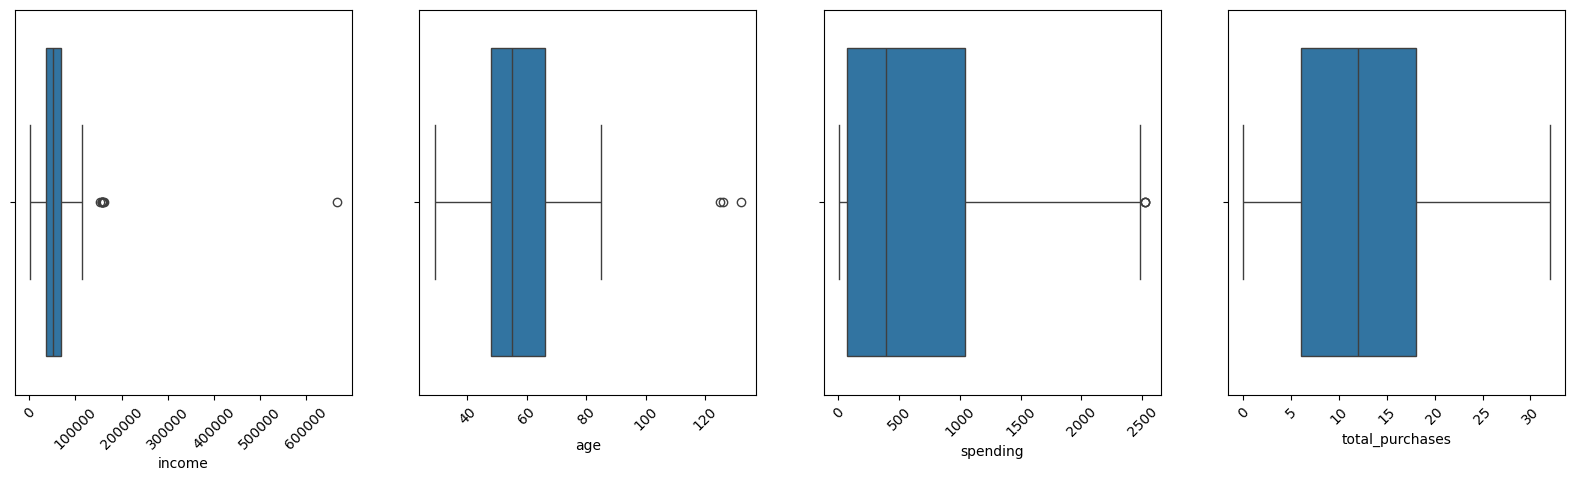

In [155]:
var = ['income','age','spending','total_purchases']
f,ax = plt.subplots(1,len(var),figsize = (20,5))
i = 0
for v in var:
  sns.boxplot(x = md[v],ax = ax[i])
  ax[i].tick_params(axis='x', rotation=45)
  i = i+1
plt.show()



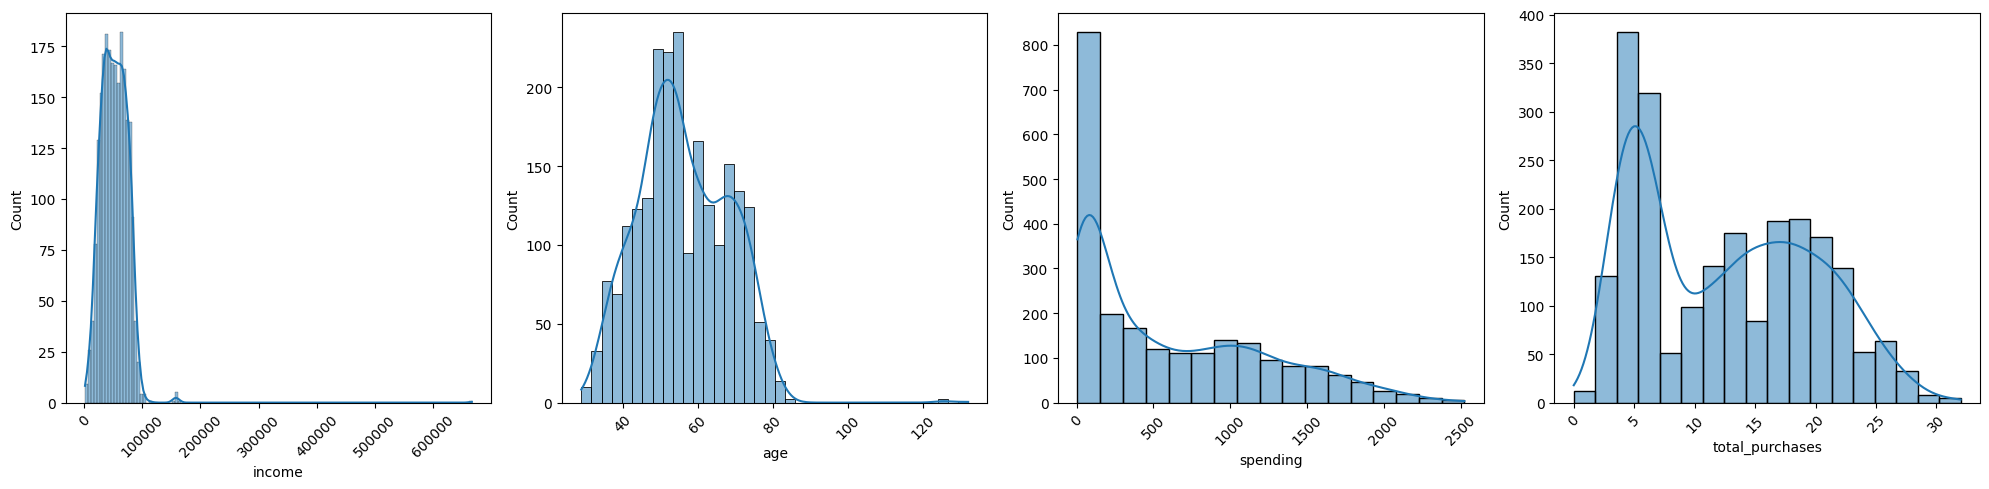

In [156]:
f,ax = plt.subplots(1,len(var),figsize = (20,5))
i = 0
for v in var:
  sns.histplot(x = md[v],ax = ax[i],kde = True)
  ax[i].tick_params(axis='x', rotation=45)
  i = i+1
plt.tight_layout()
plt.show()

In [157]:
# Treating the outliers
def outlier_detection(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  return lower_bound,upper_bound


In [158]:
for v in var:
  lower_bound,upper_bound = outlier_detection(md[v])
  print(f"Lower Bound for {v}: {lower_bound}")
  print(f"Upper Bound for {v}: {upper_bound}")
  md[v] = np.where(md[v] < lower_bound,lower_bound,md[v])
  md[v] = np.where(md[v] > upper_bound,upper_bound,md[v])


Lower Bound for income: -13587.75
Upper Bound for income: 117416.25
Lower Bound for age: 21.0
Upper Bound for age: 93.0
Lower Bound for spending: -1396.375
Upper Bound for spending: 2510.625
Lower Bound for total_purchases: -12.0
Upper Bound for total_purchases: 36.0


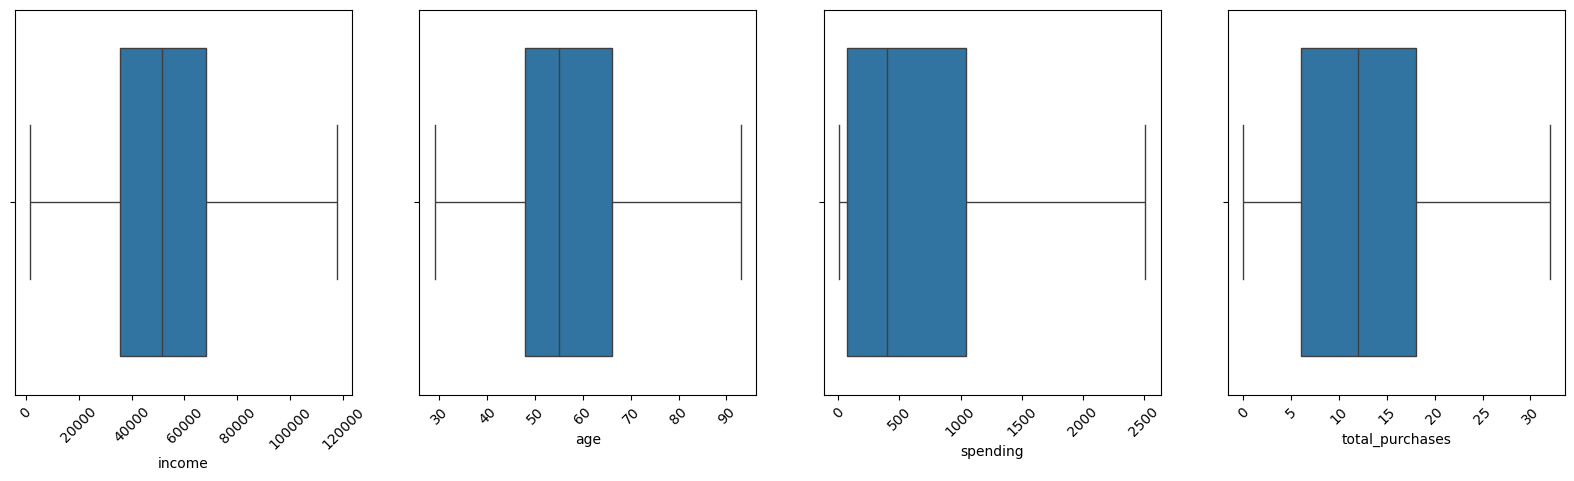

In [159]:
# Creating box plot again for checking if outliers are removed or not
var = ['income','age','spending','total_purchases']
f,ax = plt.subplots(1,len(var),figsize = (20,5))
i = 0
for v in var:
  sns.boxplot(x = md[v],ax = ax[i])
  ax[i].tick_params(axis='x', rotation=45)
  i = i+1
plt.show()



**Outliers are treated in the data set**


---



**Ordinal and One-hot Encoding on various catagorical variables**

In [160]:
md.select_dtypes('object')

,education,marital_status,country
0,Graduate,alone,SP
1,Graduate,alone,CA
2,Graduate,couple,US
3,Graduate,couple,AUS
4,Graduate,alone,SP
...,...,...,...
2235,PhD,alone,US
2236,Master's,couple,SP
2237,Graduate,alone,SP
2238,Graduate,couple,IND


In [161]:
# We will be using odinal encoding for education

In [162]:
ord = OrdinalEncoder(categories = [['Primary','Graduate',"Master's",'PhD']])
ord.fit(md[['education']])
md['education_encode'] = ord.transform(md[['education']]).flatten()

md['education'].value_counts()

,count
education,
Graduate,1127
Master's,573
PhD,486
Primary,54


In [163]:
md.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,total_children,spending,has_clidren,total_purchases,education_encode
0,1826,1970,Graduate,alone,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,55.0,0,1190.0,0,14.0,1.0
1,1,1961,Graduate,alone,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,64.0,0,577.0,0,17.0,1.0
2,10476,1958,Graduate,couple,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67.0,1,251.0,1,10.0,1.0
3,1386,1967,Graduate,couple,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,58.0,2,11.0,1,3.0,1.0
4,5371,1989,Graduate,alone,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,36.0,1,91.0,1,6.0,1.0


In [164]:
# For country and marital_status will be using one hot encoding
ohe = OneHotEncoder()
country_encoded = pd.DataFrame(ohe.fit_transform(md[['country']]).toarray(), columns=ohe.categories_[0])

md = pd.concat([md, country_encoded], axis=1)
marital_encoded = pd.DataFrame(ohe.fit_transform(md[['marital_status']]).toarray(), columns=ohe.categories_[0])
md = pd.concat([md, marital_encoded], axis=1)
md.head()


,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,total_children,spending,has_clidren,total_purchases,education_encode,AUS,CA,GER,IND,ME,SA,SP,US,alone,couple
0,1826,1970,Graduate,alone,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,55.0,0,1190.0,0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1961,Graduate,alone,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,64.0,0,577.0,0,17.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10476,1958,Graduate,couple,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67.0,1,251.0,1,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1386,1967,Graduate,couple,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,58.0,2,11.0,1,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5371,1989,Graduate,alone,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,36.0,1,91.0,1,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [165]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   income               2240 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   mntwines             2240 non-null   int64         
 10  mntfruits            2240 non-null   int64         
 11  mntmeatproducts      2240 non-null   int64         
 12  mntfishproducts      2240 non-null   int64         
 13  mntsweetproducts     2240 non-nul

**Ordinal and One-hot Encoding is done in categorical varibales 'education' and ('country' ,'marital_status') respectively.**

In [166]:
md.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country', 'age',
       'total_children', 'spending', 'has_clidren', 'total_purchases',
       'education_encode', 'AUS', 'CA', 'GER', 'IND', 'ME', 'SA', 'SP', 'US',
       'alone', 'couple'],
      dtype='object')

In [167]:
# Creating a heat map and Showing the correlation between numeric variables
num_col = ['income', 'kidhome',
'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
'complain', 'age',
'total_children', 'spending', 'has_clidren', 'total_purchases','education_encode']

In [168]:
corr_data = md[num_col].corr()


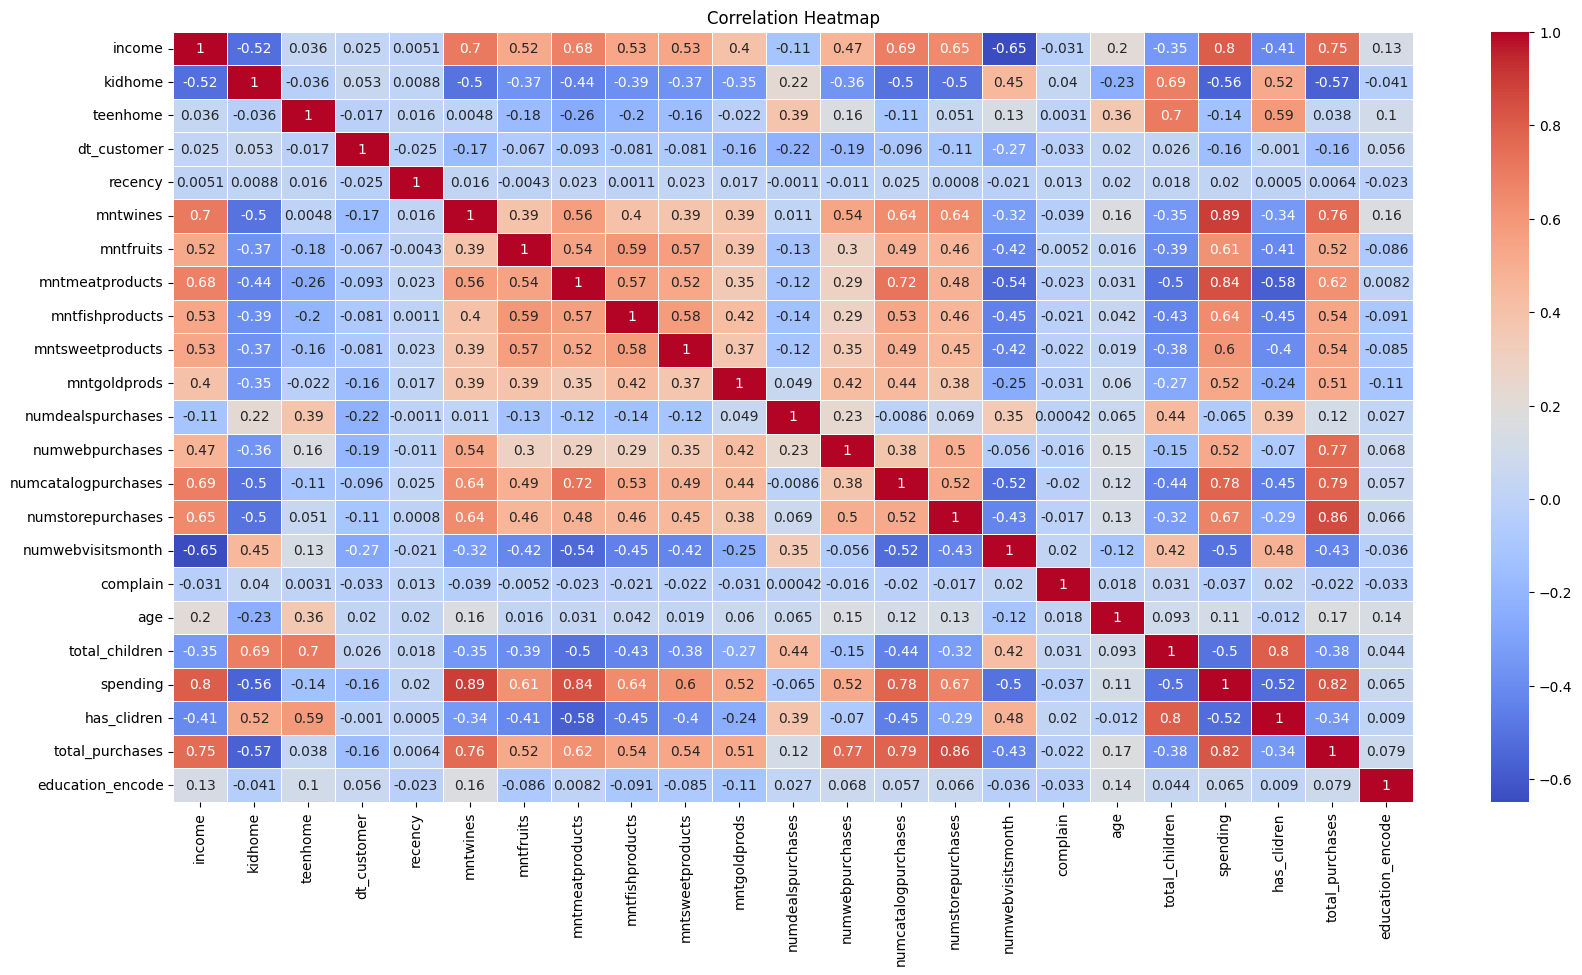

In [169]:
#Creating heatmap of correlation between variables.
plt.figure(figsize=(20, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



---



**Testing the Following Hypothesis:**

*   Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
*   Customers with children likely experience time constraints, making online shopping a more convenient option.
*   Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
*   Does the United States significantly outperform the rest of the world in total purchase volumes?





In [170]:
#a. H0 : For old customers no. of purchase store <= no.of purchase online
#   H1 : For old customers no. of purchase store > no.of purchase online

In [194]:
store = md[md['age']> 60]['numstorepurchases']
web = md[md['age']> 60]['numwebpurchases']
stats.ttest_ind(store,web,alternative= 'greater')

TtestResult(statistic=np.float64(12.456766178670938), pvalue=np.float64(2.4611358913448465e-34), df=np.float64(1570.0))

#Here, pvalue = 2.4611358913448465e-34  (which is much lower than alpha of 5% )so we reject the null hypothesis. And Conclude older customers prefer traditional in-store shopping

In [172]:
#b. H0 : For customers having children  no. of purchase online <= no.of purchase store
#   H1 : For customers having children  no. of purchase online > no.of purchase store
store_have_child = md[md['has_clidren']==   1]['numstorepurchases']
web_have_child = md[md['has_clidren']== 1]['numwebpurchases']
stats.ttest_ind(web_have_child,store_have_child,alternative= 'greater')

TtestResult(statistic=np.float64(-11.85534380488127), pvalue=np.float64(1.0), df=np.float64(3202.0))

#Here, pvalue = 1 (which is greater than alpha of 5% )so we fail to reject the null hypothesis. And conclude customers having kids prefer in-store shopping rather than online purchases.

In [173]:
#c. H0 : purchase on the other channels <= number of store purchase
#   H1:  purchase on the other channels > number of store purchase

In [174]:
other = md['numwebpurchases'] + md['numcatalogpurchases']
store = md['numstorepurchases']
stats.ttest_ind(other,store,alternative= 'greater')

TtestResult(statistic=np.float64(7.884334964023309), pvalue=np.float64(1.971324447658957e-15), df=np.float64(4478.0))

#Here, pvalue = 1.971324447658957e-15 (which is much lower  than alpha of 5% )so we reject the null hypothesis. And conclude that customers prefer more  catalogpurchases and webpurchases over store purchase

In [175]:
#d. H0 : Total purchase in US <= Total purchse in rest of the world
#    H1 : Total purchase in US > Total purchse in rest of the world


In [176]:
us_purchase = md[md['country']== 'US']['total_purchases']
non_us_purchase = md[md['country']!= 'US']['total_purchases']
stats.ttest_ind(us_purchase,non_us_purchase,alternative= 'two-sided')

TtestResult(statistic=np.float64(1.4512386847675383), pvalue=np.float64(0.14685355981832418), df=np.float64(2238.0))

# Here p > 0.01. So we fails to reject the null hypothesis . And conclude US is underperforming from the rest of the world in terms of volume.


---



#8.	Use appropriate visualization to help analyze the following:

In [177]:

# a.	Identify the top-performing products and those with the lowest revenue.
# b.	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.
# c.	Determine the country with the highest number of customers who accepted the last campaign.
# d.	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.
# e.	Analyze the educational background of customers who lodged complaints in the last two years.


In [178]:
md.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,total_children,spending,has_clidren,total_purchases,education_encode,AUS,CA,GER,IND,ME,SA,SP,US,alone,couple
0,1826,1970,Graduate,alone,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,55.0,0,1190.0,0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1961,Graduate,alone,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,64.0,0,577.0,0,17.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10476,1958,Graduate,couple,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67.0,1,251.0,1,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1386,1967,Graduate,couple,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,58.0,2,11.0,1,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5371,1989,Graduate,alone,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,36.0,1,91.0,1,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [179]:
products = md[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']].mean().round(2).sort_values(ascending=False).reset_index()
products

,index,0
0,mntwines,303.94
1,mntmeatproducts,166.95
2,mntgoldprods,44.02
3,mntfishproducts,37.53
4,mntsweetproducts,27.06
5,mntfruits,26.30


In [180]:
products['index'] = products['index'].str.replace('mnt', '', regex=False)
products

,index,0
0,wines,303.94
1,meatproducts,166.95
2,goldprods,44.02
3,fishproducts,37.53
4,sweetproducts,27.06
5,fruits,26.30


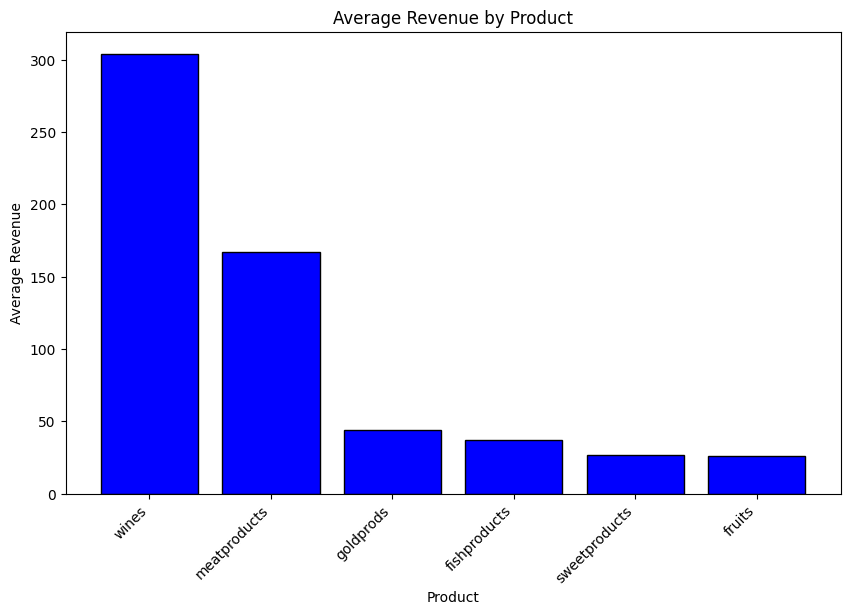

In [181]:
# Create bar plot for the revenue
plt.figure(figsize=(10, 6))
plt.bar(products['index'], products[0], color='blue', edgecolor='black')
plt.title('Average Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

**Wines Generting the higest revenue and Fruits generating the lowest revenue**

In [182]:
md['age'].min()

29.0

In [183]:
md['age'].max()

93.0

In [184]:
range = 93-29
range # will take 12-13 years of age buckets.

64

In [185]:
md['age_group'] = pd.cut(md['age'],bins = 5,labels = ['26-38','39-51','52-64','65-77','78-90'])


In [186]:
agroup = md[md['acceptedcmp5']==1]['age_group'].value_counts().reset_index().sort_values(by='age_group') # age group wise acceptance rate of last campaign
agroup

,age_group,count
3,26-38,29
0,39-51,53
1,52-64,39
2,65-77,37
4,78-90,5


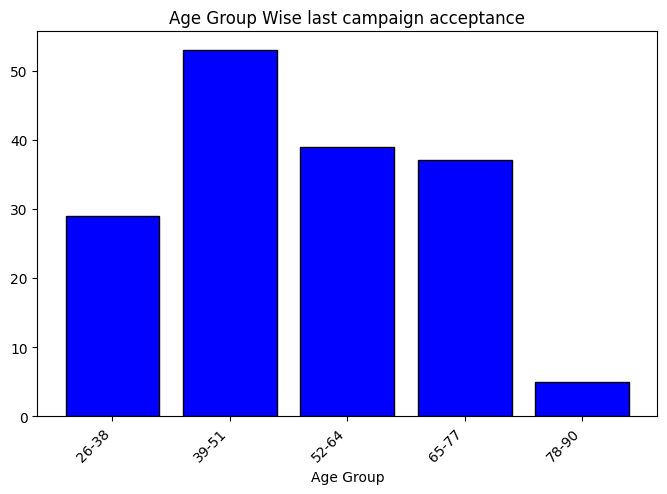

In [187]:
plt.figure(figsize=(8, 5))
plt.bar(agroup['age_group'], agroup['count'], color='blue', edgecolor='black')
plt.title('Age Group Wise last campaign acceptance')
plt.xlabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.show()

In [188]:
# Country wise  acceptance rate of last campaign
country_wise = md[md['acceptedcmp5']==1]['country'].value_counts().reset_index().sort_values(by='count',ascending = False) # age group wise acceptance rate of last campaign
country_wise

,country,count
0,SP,89
1,CA,21
2,SA,21
3,AUS,13
4,GER,8
5,IND,6
6,US,5


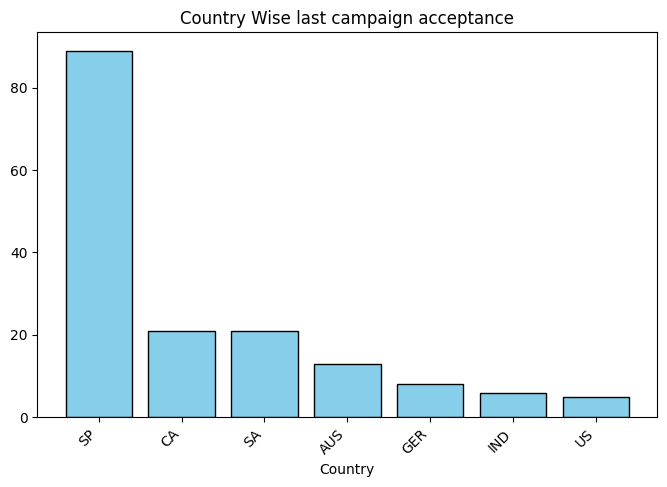

In [189]:
plt.figure(figsize=(8, 5))
plt.bar(country_wise['country'], country_wise['count'], color='skyblue', edgecolor='black')
plt.title('Country Wise last campaign acceptance')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()

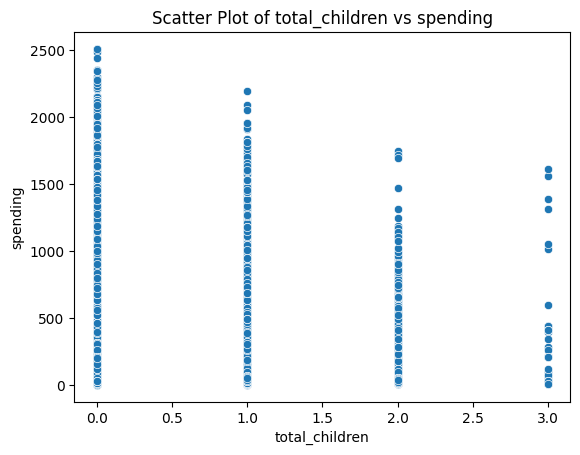

In [190]:
# Correlation or pattern between Number of childen and Family Expenditure (spending)
sns.scatterplot(data=md, x='total_children', y='spending')
plt.title('Scatter Plot of total_children vs spending')
plt.show()

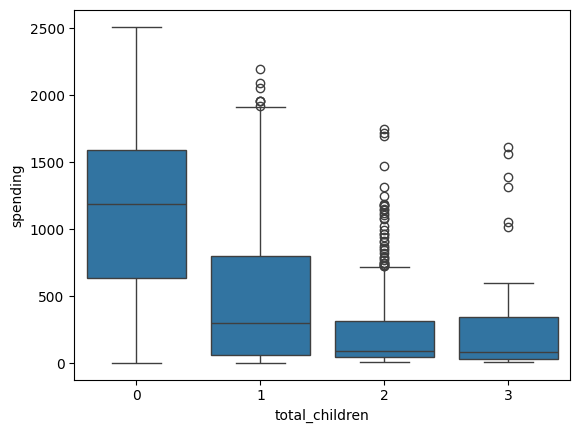

In [191]:
sns.boxplot(x = md['total_children'],y = md['spending'])
plt.show()

In [192]:
# Bar plot of customers educational Qualification vs cout of complaint lodge in last 2 years
comp = md[md['complain']==1]['education'].value_counts().reset_index().sort_values(by='count',ascending = False)
comp


,education,count
0,Graduate,14
1,Master's,6
2,PhD,1


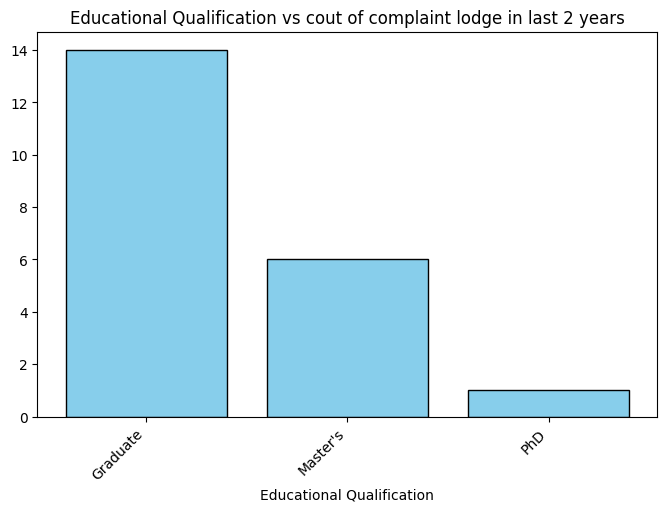

In [193]:
plt.figure(figsize=(8, 5))
plt.bar(comp['education'], comp['count'], color='skyblue', edgecolor='black')
plt.title('Educational Qualification vs cout of complaint lodge in last 2 years')
plt.xlabel('Educational Qualification')
plt.xticks(rotation=45, ha='right')
plt.show()



------


